# Exercício 1 - Descobrindo o melhor K para o conjunto de dados

### Etapas
1. Capturar dados das plantas
2. delimitar x, y -> dados das plantas e suas respostas, target.
3. Separar os dados em dos conjuntos: Treino e Teste
4. Criar um dict de k->respostas
5. Fazer um loop de 1 a 25 para o valor de k.
6. Dentro do loop: gerar os dados com base no k, fazer predição e, por fim, fazer a comparação entre os resultados gerados e os esperados e guardar no dict.
7. Imprimir o dict e o melhor K.

### 1. Capturando dados

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()


### 2. Demitando x, y

In [4]:
x = iris.data
y = iris.target

### 3. Separando o conjunto de dados: Treino e Teste

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### 4. Dict de K

In [109]:
dict_k = {}

### 5. Loop para K, Treino, Previsão, add no Dict

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for i in range(25):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(x_train, y_train)
    previsoes = knn.predict(x_test)
    acerto = metrics.accuracy_score(y_test,previsoes)
    dict_k[i+1] = round(acerto,4)

    

### 6. Imprimindo o melhor K

In [111]:
import pprint as pt
print(pt.pprint(dict_k))
print('Para o K',max(dict_k, key=dict_k.get),'é o melhor: ',dict_k[max(dict_k, key=dict_k.get)])

{1: 0.9474,
 2: 0.9474,
 3: 0.9474,
 4: 0.9474,
 5: 0.9474,
 6: 0.9474,
 7: 0.9211,
 8: 0.9474,
 9: 0.9211,
 10: 0.9211,
 11: 0.9211,
 12: 0.9211,
 13: 0.9211,
 14: 0.9474,
 15: 0.9211,
 16: 0.9211,
 17: 0.9211,
 18: 0.9211,
 19: 0.9211,
 20: 0.9211,
 21: 0.9211,
 22: 0.9211,
 23: 0.9211,
 24: 0.9211,
 25: 0.9211}
None
Para o K 1 é o melhor:  0.9474


### 7. Gráfico

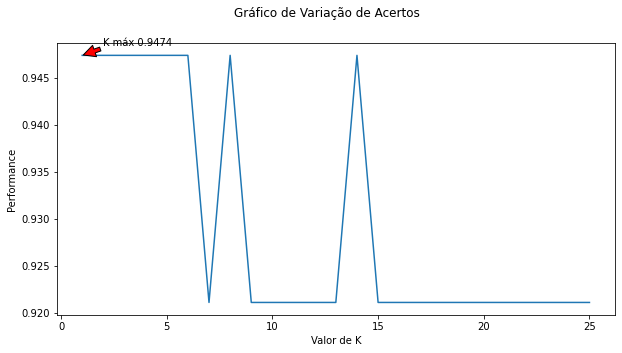

In [112]:
import matplotlib.pyplot as plt

k_max = max(dict_k, key=dict_k.get)
value_max = dict_k[max(dict_k, key=dict_k.get)]

#Tamanho do gráfico
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

#Seta...
plt.plot(dict_k.keys(), dict_k.values(), lw = 1.5)
            
plt.annotate('K máx '+str(value_max), xy=(k_max, value_max), xytext=(k_max+1, value_max+0.001),
             arrowprops=dict(facecolor='red', shrink=0.05),)

plt.xlabel('Valor de K')
plt.ylabel('Performance')
plt.suptitle('Gráfico de Variação de Acertos')
plt.show()